<a href="https://colab.research.google.com/github/pramodkumhal/Deep-Learning/blob/main/Customer_Churn_Prediction/Customer_Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [7]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [8]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype('int')

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [13]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [14]:
X.shape

(10000, 11)

In [15]:
y.shape

(10000,)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
X_train.shape

(8000, 11)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [24]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5849 - loss: 0.6952 - val_accuracy: 0.8000 - val_loss: 0.4774
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7977 - loss: 0.4747 - val_accuracy: 0.8081 - val_loss: 0.4414
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8226 - loss: 0.4224 - val_accuracy: 0.8144 - val_loss: 0.4275
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8229 - loss: 0.4203 - val_accuracy: 0.8181 - val_loss: 0.4155
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8272 - loss: 0.4141 - val_accuracy: 0.8231 - val_loss: 0.4014
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.4005 - val_accuracy: 0.8256 - val_loss: 0.3903
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - loss: 0.3790 - val_accuracy: 0.8363 - val_loss: 0.3793
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8434 - loss: 0.3789 - val_accu

In [25]:
model.layers[0].get_weights()

[array([[-0.037831  , -0.3259335 ,  0.05158081,  0.22698927, -0.09263164,
          0.26821244, -0.24648888,  0.24316895,  0.37952524, -0.664493  ,
          0.07181673],
        [-0.94020385,  0.33861828,  0.37355503, -0.7099662 ,  0.26261374,
         -0.30313218,  0.01961986,  0.5498977 , -0.24319008, -0.38882887,
         -1.0353794 ],
        [ 0.12348773,  0.22896005, -0.45561385, -0.22025095,  0.00434321,
         -0.17629749,  0.47973537,  0.34271032, -0.22754246, -0.1916122 ,
         -0.2387602 ],
        [-0.13504727,  0.32966524, -0.11374736, -0.09210169,  0.21437836,
         -0.60846573, -0.5782086 , -0.8653837 , -0.29249698, -0.24892661,
          0.18593493],
        [-0.05197926,  1.0334939 , -0.46200603,  0.10472844,  0.1256606 ,
         -0.7991372 , -0.21803439, -0.22922885,  1.2661198 , -0.0913844 ,
          0.16026539],
        [ 0.10632483,  0.16930723, -0.0186636 , -0.0460386 , -0.05404036,
          0.08366269, -0.13331233,  0.22635558, -0.13036111, -0.4432425

In [26]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [27]:
y_pred = np.where(y_log>0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.864

In [29]:
history.history

{'accuracy': [0.7057812213897705,
  0.803906261920929,
  0.8129687309265137,
  0.8206250071525574,
  0.8285937309265137,
  0.8359375,
  0.84375,
  0.8478124737739563,
  0.8506249785423279,
  0.850781261920929,
  0.8543750047683716,
  0.8575000166893005,
  0.8578125238418579,
  0.8575000166893005,
  0.8604687452316284,
  0.8600000143051147,
  0.8604687452316284,
  0.8596875071525574,
  0.8606250286102295,
  0.8623437285423279,
  0.8614062666893005,
  0.8615624904632568,
  0.862500011920929,
  0.8621875047683716,
  0.8629687428474426,
  0.8604687452316284,
  0.86328125,
  0.862500011920929,
  0.8615624904632568,
  0.862500011920929,
  0.8623437285423279,
  0.8614062666893005,
  0.8634374737739563,
  0.8609374761581421,
  0.8621875047683716,
  0.8618749976158142,
  0.8623437285423279,
  0.8620312213897705,
  0.8626562356948853,
  0.8626562356948853,
  0.8609374761581421,
  0.8626562356948853,
  0.8637499809265137,
  0.8629687428474426,
  0.8646875023841858,
  0.8646875023841858,
  0.86265

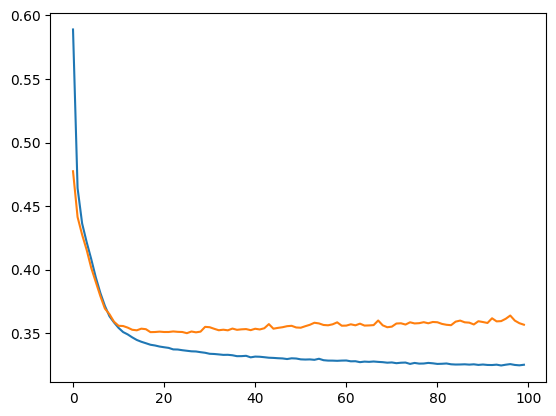

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

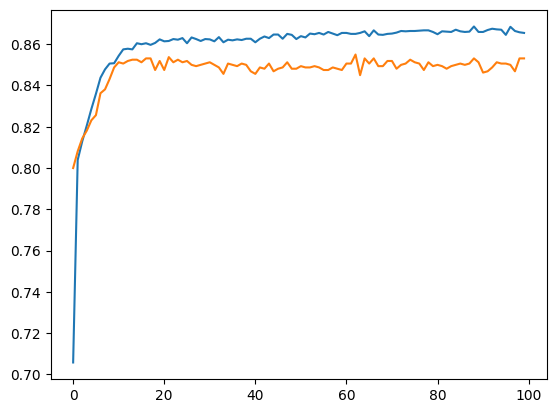

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])